# COVID-19 Data Set


> ##### Antes de cargar el csv, he modificado los datos faltantes en el propio archivo, tales como 97, 99 o la fecha 9999-99-99. Así puedo trabajar más cómodo con los datos.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [24]:
df = pd.read_csv('Covid-Dataset.csv')
df.head()

/tmp/ipykernel_900/973827582.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Covid-Dataset.csv')


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


En las Boolean features, 1 significa "sí" y 2 significa "no". Valores como 97 y 99 son datos faltantes.

## Análisis exploratorio


In [25]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048230e+06,521310.000000,1.045237e+06,1.045572e+06,1.045596e+06,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,192543.000000
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,1.825351,1.864379e+00,4.177565e+01,1.984403,1.880420e+00,1.985594e+00,1.969805e+00,1.986442e+00,1.844349e+00,1.973130e+00,1.980135e+00,1.847145e+00,1.981920e+00,1.919285e+00,5.305653e+00,1.912446
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,0.379668,3.423854e-01,1.687954e+01,0.123911,3.244694e-01,1.191554e-01,1.711242e-01,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.881165e+00,0.282647
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,1.210000e+02,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

- El conjunto de entrenamiento tiene 1048575 ejemplos y 20 características. 
- 5 de las features son float, 1 es un objeto(string) y el resto son int.

### Desbalanceo de clases

<AxesSubplot: xlabel='CLASIFFICATION_FINAL', ylabel='count'>

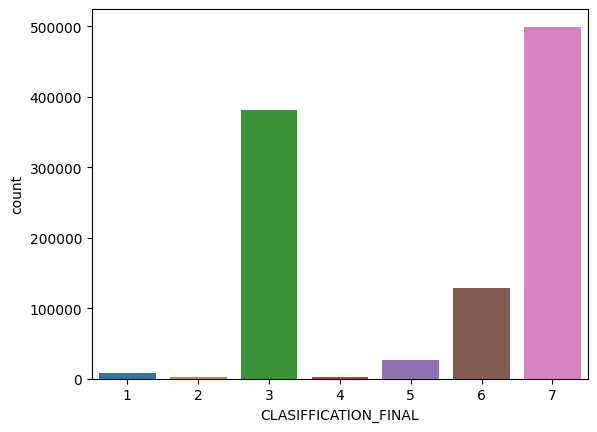

In [48]:
sns.countplot(x='CLASIFFICATION_FINAL', data=df)

Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados. 4 o superior significa que el paciente no es portador de covid o que la prueba no es concluyente.

> Se observa que hay más gente cuyo diagnostico final no fue COVID

<AxesSubplot: xlabel='DATE_DIED', ylabel='count'>

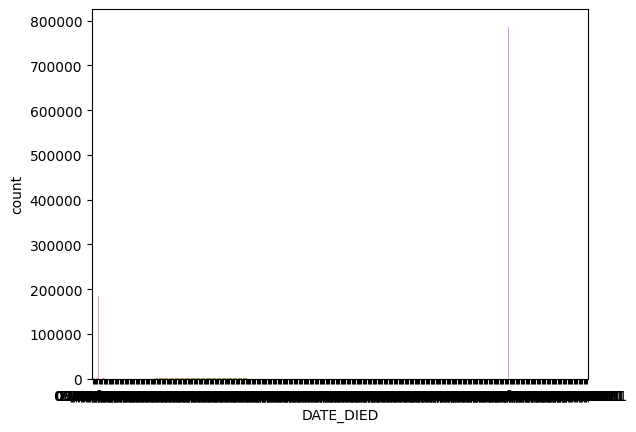

In [27]:
sns.countplot(x='DATE_DIED', data=df)

> Casi 20,000 personas sobrevivieron al virus, el resto murió

### Exploración de variables

<AxesSubplot: xlabel='AGE', ylabel='count'>

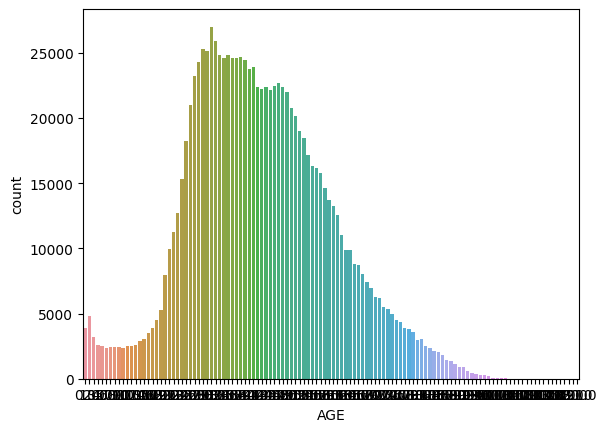

In [39]:
sns.countplot(x='AGE', data=df)

> La mayoría de los pacientes son gente joven

<AxesSubplot: xlabel='PNEUMONIA', ylabel='count'>

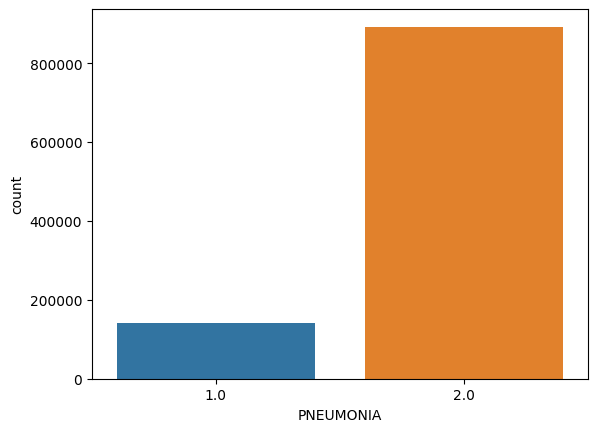

In [40]:
sns.countplot(x='PNEUMONIA', data=df)

> Un pequeño porcentaje de los pacientes padeció de neumonía

> Podemos ver que práctiamente en todos los jóvenes no hay neumonía pero a medida que vamos avanzando a la mediana edad van apareciendo casos. Sin embargo, en las edades más viejas Hay casos de 

<AxesSubplot: xlabel='AGE', ylabel='SEX'>

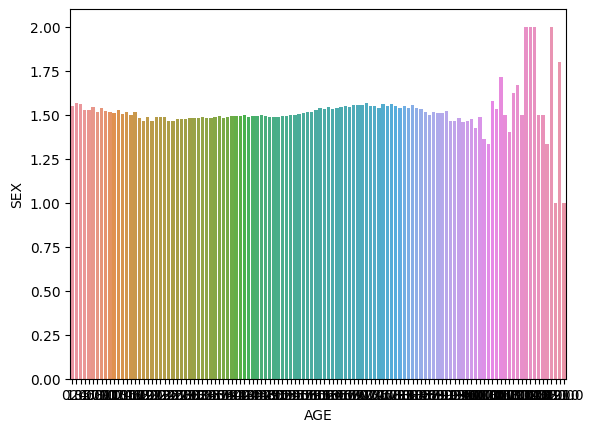

In [44]:
sns.barplot(x='AGE', y='SEX', data=df, errorbar=None)

> Hay más hombres que mujeres aunque en las edades viejas hay muchos más hombres

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

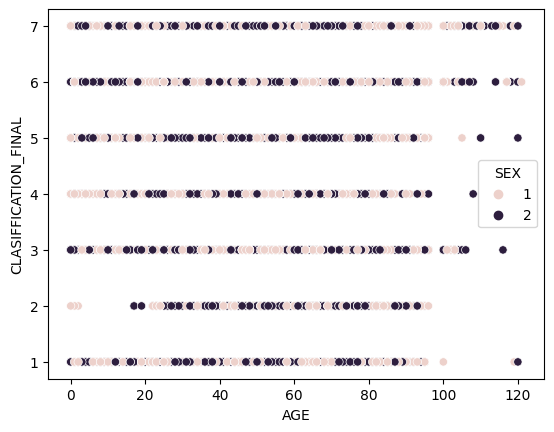

In [50]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='SEX', data=df)

> Como era de esperar, el sexo no es un causante de COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

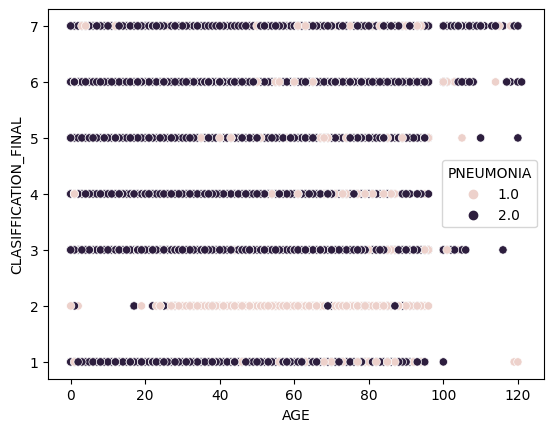

In [49]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PNEUMONIA', data=df)

> Se puede observar una clara "dependencia" entre la neumonía y el COVID. En los pacientes con COVID grado 2, la neumonía es casi total.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

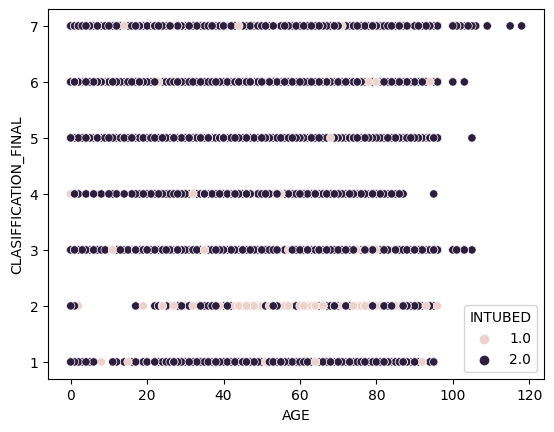

In [51]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='INTUBED', data=df)

> Los pacientes de COVID grado 2 eran más propensos a ser intubados

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

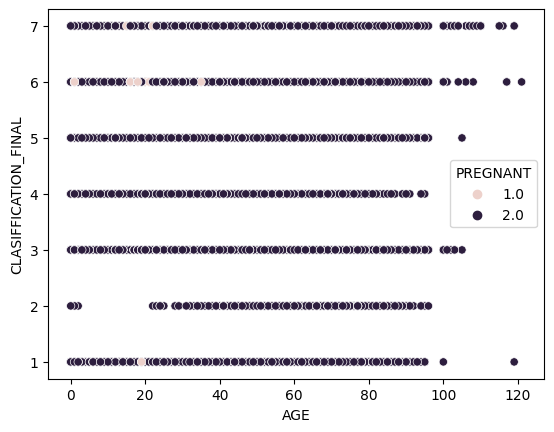

In [53]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PREGNANT', data=df)

> No hubo casi ninguna embarazada con COVID, además de que no es causante de él

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


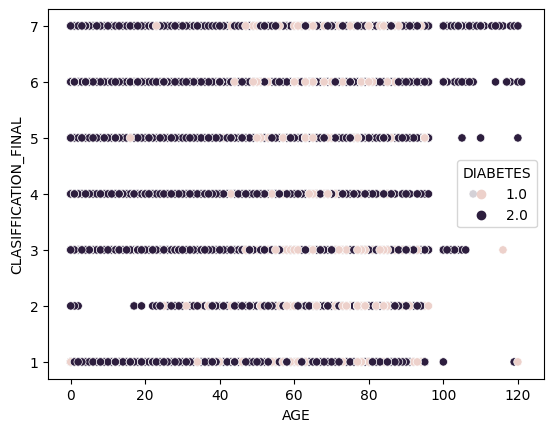

In [54]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='DIABETES', data=df)